# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [38]:
%matplotlib inline
# import numpy and pandas
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [2]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [3]:
# Your code here:
fifa.head()


Name  Age Nationality  Overall  Potential  \
0           L. Messi   31   Argentina       94         94   
1  Cristiano Ronaldo   33    Portugal       94         94   
2          Neymar Jr   26      Brazil       92         93   
3             De Gea   27       Spain       91         93   
4       K. De Bruyne   27     Belgium       91         92   

                  Club    Value Preferred Foot Position  Weak Foot  \
0         FC Barcelona  €110.5M           Left       RF        4.0   
1             Juventus     €77M          Right       ST        4.0   
2  Paris Saint-Germain  €118.5M          Right       LW        5.0   
3    Manchester United     €72M          Right       GK        3.0   
4      Manchester City    €102M          Right      RCM        5.0   

   Acceleration  SprintSpeed  Stamina  Strength  LongShots  Aggression  \
0          91.0         86.0     72.0      59.0       94.0        48.0   
1          89.0         91.0     88.0      79.0       93.0        63.0   
2          94.0         90.0     81.0      49.0       82.0        56.0   
3          57.0         58.0     43.0      64.0       12.0        38.0   
4          78.0         76.0     90.0      75.0       91.0        76.0   

   Interceptions  Positioning  Vision  Penalties  
0           22.0         94.0    94.0       75.0  
1           29.0         95.0    82.0       85.0  
2           36.0         89.0    87.0       81.0  
3           30.0         12.0    68.0       40.0  
4           61.0         87.0    94.0       79.0

Player's values are expressed in euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell and assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions or thousands but converting them carefully into the same scale. 

In [4]:
# Your code here:
fifa['ValueNumeric'] = fifa['Value'].apply(lambda x:x.strip('€').strip('M').strip('K')).astype(float)
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            18207 non-null  object 
 1   Age             18207 non-null  int64  
 2   Nationality     18207 non-null  object 
 3   Overall         18207 non-null  int64  
 4   Potential       18207 non-null  int64  
 5   Club            17966 non-null  object 
 6   Value           18207 non-null  object 
 7   Preferred Foot  18159 non-null  object 
 8   Position        18147 non-null  object 
 9   Weak Foot       18159 non-null  float64
 10  Acceleration    18159 non-null  float64
 11  SprintSpeed     18159 non-null  float64
 12  Stamina         18159 non-null  float64
 13  Strength        18159 non-null  float64
 14  LongShots       18159 non-null  float64
 15  Aggression      18159 non-null  float64
 16  Interceptions   18159 non-null  float64
 17  Positioning     18159 non-null 

#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [5]:
# Your code here:
from scipy.stats import f_oneway

pivot = pd.pivot_table(data = fifa,
                      index = 'Position', 
                       columns = 'Preferred Foot', 
                       values= 'ValueNumeric')
f_oneway(pivot['Left'], pivot['Right'])


F_onewayResult(statistic=0.17588586706705298, pvalue=0.6766605267197828)

What is your conclusion from this ANOVA?

In [6]:
# Your conclusions here:
#p-value is too large, then the variances in between categories is the same



After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [10]:
# Your code here:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


model = ols('ValueNumeric ~ C(Position)*C(fifa["Preferred Foot"])', data = fifa).fit()
anova_table = sm.stats.anova_lm(model, typ =2)
anova_table


sum_sq       df         F  \
C(Position)                            8.767522e+06     26.0  4.033759   
C(fifa["Preferred Foot"])              7.292211e+04      1.0  0.872300   
C(Position):C(fifa["Preferred Foot"])  3.050243e+06     26.0  1.403355   
Residual                               1.512530e+09  18093.0       NaN   

                                             PR(>F)  
C(Position)                            2.141952e-11  
C(fifa["Preferred Foot"])              3.503319e-01  
C(Position):C(fifa["Preferred Foot"])  8.327900e-02  
Residual                                        NaN

What is your conclusion from this ANOVA?

In [11]:
# we can conclude that the p-values are lower enough, then they are statistically significant, meaning that theres a difference 
# in between numeric values is affected by preferred foot and position

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [32]:
# Your code here:
fifa.isnull().sum()
fifa.dropna(inplace = True)
fifa.isnull().sum()
fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17918 entries, 0 to 18206
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            17918 non-null  object 
 1   Age             17918 non-null  int64  
 2   Nationality     17918 non-null  object 
 3   Overall         17918 non-null  int64  
 4   Potential       17918 non-null  int64  
 5   Club            17918 non-null  object 
 6   Value           17918 non-null  object 
 7   Preferred Foot  17918 non-null  object 
 8   Position        17918 non-null  object 
 9   Weak Foot       17918 non-null  float64
 10  Acceleration    17918 non-null  float64
 11  SprintSpeed     17918 non-null  float64
 12  Stamina         17918 non-null  float64
 13  Strength        17918 non-null  float64
 14  LongShots       17918 non-null  float64
 15  Aggression      17918 non-null  float64
 16  Interceptions   17918 non-null  float64
 17  Positioning     17918 non-null 

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [31]:
# Your code here:
x = sm.add_constant(fifa[['Stamina', 'SprintSpeed']])
y = fifa['ValueNumeric']

model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.454
Date:                Mon, 31 Oct 2022   Prob (F-statistic):             0.0116
Time:                        17:13:13   Log-Likelihood:            -1.2702e+05
No. Observations:               17918   AIC:                         2.540e+05
Df Residuals:                   17915   BIC:                         2.541e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         280.4297     10.390     26.991      

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [ ]:
# Your conclusions here:
# The r squared pretty much is 0, meaning that is not a good model at all
# the p values is close to 0 on the stamina, in that sense we can reject the null hypothesis and 
# take it as statistically relevant, not the same case though for SprintSpeed that is bigger that 0.05
# then SprintSpeed is not statistically relevant for the model


Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [35]:
# Your code here:

x = sm.add_constant(fifa['Potential'])
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     1054.
Date:                Mon, 31 Oct 2022   Prob (F-statistic):          9.15e-225
Time:                        17:19:11   Log-Likelihood:            -1.2651e+05
No. Observations:               17918   AIC:                         2.530e+05
Df Residuals:                   17916   BIC:                         2.530e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1062.4312     24.547     43.281      0.0

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [ ]:
# Your conclusions here:
#We can see that it still not a good model, because the r2 isjust at 0.056 
# nevertheless, the pvalue is 0, meaning that we reject the null hypothesis and the variable potential is relevant for the model


Plot a scatter plot of value vs. potential. Do you see a linear relationship?

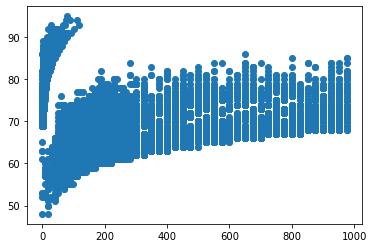

In [42]:
# Your code here:
plt.scatter(fifa['ValueNumeric'], fifa['Potential']);
